In [96]:
# 모듈 로딩
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from bs4 import BeautifulSoup
from selenium import webdriver
from sklearn.utils import all_estimators
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from urllib.request import urlopen,Request,urlretrieve

In [70]:
# 동적 웹 크롤링으로 사진저장 함수
def image_save(urlpath,charname):
    driver = webdriver.Chrome('chromedriver.exe') # C:/Users/User/EXAM_PANDAS/DAY-0630/DAY-0920
    #driver = webdriver.Chrome('C:\\workspace’) # Windows 사용자의 설치 경로
    driver.get(urlpath)
    html=driver.page_source
    soup=BeautifulSoup(html,'html.parser')
    driver.quit()

    # 태그-속성 찾기
    image_finds=soup.select("div.bRMDJf img")
    
    # 이미지의 url찾기
    image=[]
    for image_find in image_finds:
        try:
            image.append(image_find['src'])
            image.append(image_find['data-src'])
        except:
            pass
    
    # 폴더 만들기
    if not os.path.exists('./departdata'+charname):
        os.makedirs('./departdata'+charname)
    
    # 파일 저장하기
    for i in range(0,len(image)):
        urlretrieve(image[i],'./departdata'+charname+'/'+charname+str(i)+'.png')

    # 파일 크기 조절
    for png in os.listdir('./departdata'+charname):
        Image.open('./departdata'+charname+'/'+png).resize((50,50)).save('./departdata'+charname+'/'+png)

In [71]:
# 신세계
image_save('https://www.google.com/search?q=%EC%8B%A0%EC%84%B8%EA%B3%84%EB%B0%B1%ED%99%94%EC%A0%90+%EB%A1%9C%EA%B3%A0&tbm=isch&ved=2ahUKEwiWx8zJs6L6AhUzNqYKHQVnCpoQ2-cCegQIABAA&oq=%EC%8B%A0%EC%84%B8%EA%B3%84%EB%B0%B1%ED%99%94%EC%A0%80&gs_lcp=CgNpbWcQARgBMgUIABCABDIFCAAQgAQyBQgAEIAEMgUIABCABDIFCAAQgAQyBQgAEIAEMgUIABCABDIFCAAQgAQyBQgAEIAEMgUIABCABDoECCMQJzoLCAAQgAQQsQMQgwFQ0QVY9w9g9xtoAnAAeAGAAYcBiAGHCpIBBDAuMTCYAQCgAQGqAQtnd3Mtd2l6LWltZ8ABAQ&sclient=img&ei=CDApY5ajNLPsmAWFzqnQCQ&bih=744&biw=767','shinsegae')

# 현대
image_save('https://www.google.com/search?q=%ED%98%84%EB%8C%80%EB%B0%B1%ED%99%94%EC%A0%90+%EB%A1%9C%EA%B3%A0&tbm=isch&ved=2ahUKEwi0sPHOs6L6AhUGdpQKHRNvCvIQ2-cCegQIABAA&oq=%ED%98%84%EB%8C%80%EB%B0%B1%ED%99%94%EC%A0%90+%EB%A1%9C%EA%B3%A0&gs_lcp=CgNpbWcQAzIFCAAQgAQyBQgAEIAEMgUIABCABDIGCAAQHhAIMgYIABAeEAg6BAgjECdQ1wNYrQtgpA9oAHAAeACAAbwBiAGUCJIBAzAuNpgBAKABAaoBC2d3cy13aXotaW1nwAEB&sclient=img&ei=EzApY_TaOYbs0QST3qmQDw&bih=744&biw=767', 'hyundai')

# 롯데 
image_save('https://www.google.com/search?q=%EB%A1%AF%EB%8D%B0%EB%B0%B1%ED%99%94%EC%A0%90+%EB%A1%9C%EA%B3%A0&tbm=isch&ved=2ahUKEwiQmOv-tKL6AhVSFYgKHY_0CaAQ2-cCegQIABAA&oq=%EB%A1%AF%EB%8D%B0%EB%B0%B1%ED%99%94%EC%A0%90+%EB%A1%9C%EA%B3%A0&gs_lcp=CgNpbWcQAzIFCAAQgAQyBQgAEIAEMgUIABCABDoECCMQJzoGCAAQHhAHOgYIABAeEAhQ-RFYzBdg_RpoAHAAeACAAaABiAHHBpIBAzAuNpgBAKABAaoBC2d3cy13aXotaW1nwAEB&sclient=img&ei=hDEpY5DGOdKqoASP6aeACg&bih=744&biw=767', 'lotte')

# 대백
image_save('https://www.google.com/search?q=%EB%8C%80%EB%B0%B1+%EB%A1%9C%EA%B3%A0&tbm=isch&ved=2ahUKEwiQmOv-tKL6AhVSFYgKHY_0CaAQ2-cCegQIABAA&oq=%EB%8C%80%EB%B0%B1+%EB%A1%9C%EA%B3%A0&gs_lcp=CgNpbWcQAzIFCAAQgAQ6BAgjECc6BggAEB4QBzoGCAAQHhAIOgQIABAYUL4GWJsKYJYPaAFwAHgBgAGdAYgBswaSAQMwLjaYAQCgAQGqAQtnd3Mtd2l6LWltZ8ABAQ&sclient=img&ei=hDEpY5DGOdKqoASP6aeACg&bih=744&biw=767', 'debec')

# 갤러리아
image_save('https://www.google.com/search?q=%EA%B0%A4%EB%9F%AC%EB%A6%AC%EC%95%84%EB%B0%B1%ED%99%94%EC%A0%90+%EB%A1%9C%EA%B3%A0&tbm=isch&ved=2ahUKEwiQmOv-tKL6AhVSFYgKHY_0CaAQ2-cCegQIABAA&oq=%EA%B0%A4%EB%9F%AC%EB%A6%AC%EC%95%84%EB%B0%B1%ED%99%94%EC%A0%90+%EB%A1%9C%EA%B3%A0&gs_lcp=CgNpbWcQARgAMgUIABCABDIGCAAQHhAHOgQIIxAnOgYIABAeEAhQsAVY-QxgghxoAnAAeAKAAZoBiAHVCpIBBDAuMTCYAQCgAQGqAQtnd3Mtd2l6LWltZ8ABAQ&sclient=img&ei=hDEpY5DGOdKqoASP6aeACg&bih=744&biw=767', 'galleria')

In [138]:
shinimg = Image.open('./departdatashinsegae/shinsegae0.png')
hyundai = Image.open('./departdatahyundai/hyundai0.png')
lotte = Image.open('./departdatalotte/lotte0.png')
debec = Image.open('./departdatadebec/debec0.png')
galleria = Image.open('./departdatagalleria/galleria0.png')

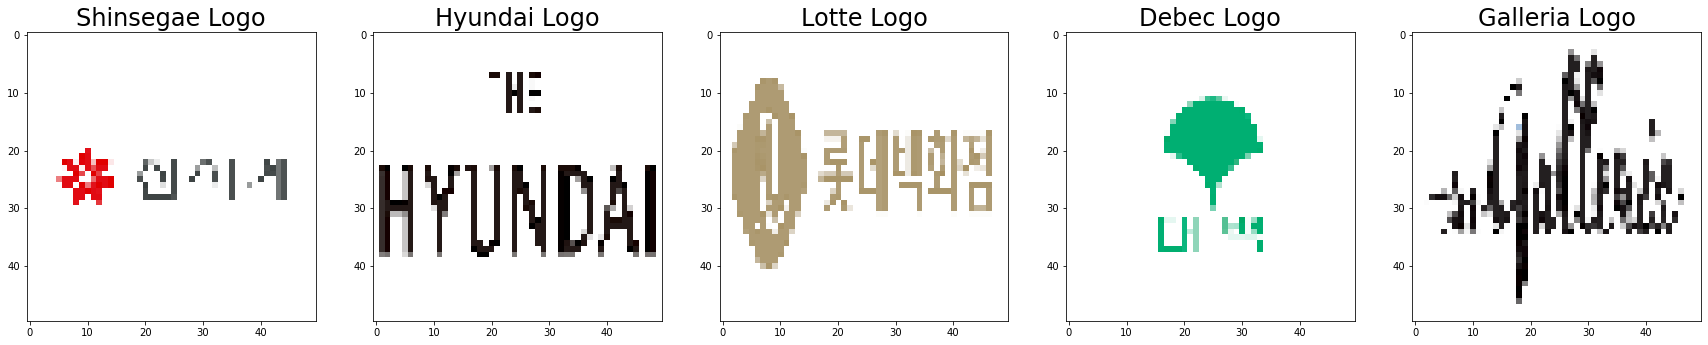

In [139]:
fig=plt.figure(figsize=(30,30))

plt.subplot(1, 5, 1)
plt.imshow(shinimg)
plt.title('Shinsegae Logo', fontsize=24)

plt.subplot(1, 5, 2)
plt.imshow(hyundai)
plt.title('Hyundai Logo', fontsize=24)

plt.subplot(1, 5, 3)
plt.imshow(lotte)
plt.title('Lotte Logo', fontsize=24)

plt.subplot(1, 5, 4)
plt.imshow(debec)
plt.title('Debec Logo', fontsize=24)

plt.subplot(1, 5, 5)
plt.imshow(galleria)
plt.title('Galleria Logo', fontsize=24)
plt.show()

In [140]:
# a = Image.open('./departdatashinsegae/shinsegae'+str(i)+'.png')
# np.array(a).reshape(-1,50*50)[0].tolist()

In [141]:
allshinimg = []
allhyundaiimg = []
alllotteimg = []
alldebecimg = []
allgalleriaimg = []


for i in range(22):
    a = Image.open('./departdatashinsegae/shinsegae'+str(i)+'.png')
    allshinimg.append(np.array(a).reshape(-1,50*50)[0].tolist())
    
for j in range(20):
    b = Image.open('./departdatahyundai/hyundai'+str(j)+'.png')
    allhyundaiimg.append(np.array(b).reshape(-1,50*50)[0].tolist())
    
for o in range(20):
    c = Image.open('./departdatalotte/lotte'+str(o)+'.png')
    alllotteimg.append(np.array(c).reshape(-1,50*50)[0].tolist())
  
for f in range(22):
    d = Image.open('./departdatadebec/debec'+str(f)+'.png')
    alldebecimg.append(np.array(d).reshape(-1,50*50)[0].tolist())
    
for g in range(20):
    e = Image.open('./departdatagalleria/galleria'+str(g)+'.png')
    allgalleriaimg.append(np.array(e).reshape(-1,50*50)[0].tolist())

In [153]:
print('신세계 로고 : ', len(allshinimg))
print('현대 로고 : ', len(allhyundaiimg))
print('롯데 로고 : ', len(alllotteimg))
print('대백 로고 : ', len(alldebecimg))
print('갤러리아 로고 : ', len(allgalleriaimg))

신세계 로고 :  22
현대 로고 :  20
롯데 로고 :  20
대백 로고 :  22
갤러리아 로고 :  20


In [154]:
allimgplus=np.row_stack((allshinimg, allhyundaiimg, alllotteimg, alldebecimg, allgalleriaimg))
allimgplus.shape

(104, 2500)

In [160]:
allimgDF=pd.DataFrame(allimgplus)
allimgDF

,0,1,2,3,4,5,6,7,8,9,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,25,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,255,255,255,255,255,255,255,255,255,255,...,92,92,92,118,118,118,107,107,107,114
100,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
101,255,255,255,255,255,255,255,255,255,255,...,64,82,107,149,160,170,255,255,255,254
102,0,0,0,0,0,25,73,2,2,28,...,0,0,0,0,0,0,0,0,0,0


In [170]:
print(allimgDF.shape)
print('---------------------------------------')
print(allimgDF.info())

(104, 2500)
---------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Columns: 2500 entries, 0 to 2499
dtypes: int32(2500)
memory usage: 1015.8 KB
None


In [175]:
allimgDF[1:]

,0,1,2,3,4,5,6,7,8,9,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,25,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,255,255,255,255,255,255,255,255,255,255,...,92,92,92,118,118,118,107,107,107,114
100,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
101,255,255,255,255,255,255,255,255,255,255,...,64,82,107,149,160,170,255,255,255,254
102,0,0,0,0,0,25,73,2,2,28,...,0,0,0,0,0,0,0,0,0,0


In [172]:
# 훈련가능하게 데이터 변환하기
input_a=input[1:]

AttributeError: 'DataFrame' object has no attribute 'reshape'

In [171]:
(x_train, y_train), (x_test, y_test) = allimgDF

ValueError: too many values to unpack (expected 2)